In [114]:
import requests
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [116]:
address = 'Times Square, NY'

geolocator = Nominatim(user_agent="gazetteer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Times Square is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Times Square is 40.757280550000004, -73.98585503545917.


In [117]:
radius = 1000
search_query = 'restaurant food'

In [118]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

In [119]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.size

750

In [120]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]



dataframe_filtered.size

480

In [121]:
dataframe_filtered.head(-1)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Carmine’s Italian Restaurant,Italian Restaurant,200 W 44th St,US,New York,United States,btwn Broadway & 8th Ave,81,"[200 W 44th St (btwn Broadway & 8th Ave), New ...","[{'label': 'display', 'lat': 40.7574973, 'lng'...",40.757497,-73.986779,NaN,10036,NY,3fd66200f964a5209ee81ee3
1,O'Donoghues Pub & Restaurant,Bar,156 W 44th St,US,New York,United States,at 7th Ave,62,"[156 W 44th St (at 7th Ave), New York, NY 1003...","[{'label': 'display', 'lat': 40.75701783963928...",40.757018,-73.985199,NaN,10036,NY,4e8cd404775bde318a4d6454
2,International Food House Restaurant & Buffet,Latin American Restaurant,240 W 35th St,US,New York,United States,NaN,764,"[240 W 35th St, New York, NY 10001, United Sta...","[{'label': 'display', 'lat': 40.75210952758789...",40.752110,-73.991829,NaN,10001,NY,4d84f78a61676dcbd7f97ee4
3,Food Emporium,Supermarket,810 8th Ave,US,New York,United States,at W 49th St,506,"[810 8th Ave (at W 49th St), New York, NY 1001...","[{'label': 'display', 'lat': 40.76181080975905...",40.761811,-73.986411,Theater District,10019,NY,4a9bc3d7f964a5202e3520e3
4,Restaurant Triomphe,French Restaurant,49 W 44th St,US,New York,United States,btw 5th & 6th,348,"[49 W 44th St (btw 5th & 6th), New York, NY 10...","[{'label': 'display', 'lat': 40.7557997041259,...",40.755800,-73.982215,NaN,10036,NY,45692b08f964a520df3d1fe3
5,Junior's Restaurant & Bakery,American Restaurant,1515 Broadway,US,New York,United States,at W 45th St,131,"[1515 Broadway (at W 45th St), New York, NY 10...","[{'label': 'display', 'lat': 40.75834934354621...",40.758349,-73.986513,Theater District,10036,NY,462a6065f964a520d9451fe3
6,Royal Grill Halal Food,American Restaurant,W110 44th St & 6th Ave,US,New York,United States,44 St,228,"[W110 44th St & 6th Ave (44 St), New York, NY ...","[{'label': 'display', 'lat': 40.75618765200581...",40.756188,-73.983563,Theater District,10036,NY,523b2b9b11d25fa3f64e0ff3
7,Essen Fast Slow Food,Deli / Bodega,290 Madison Ave,US,New York,United States,btwn E 40th & E 41st St,777,"[290 Madison Ave (btwn E 40th & E 41st St), Ne...","[{'label': 'display', 'lat': 40.75191234382708...",40.751912,-73.979955,NaN,10017,NY,4fd63285e4b02bbdc6bc66a6
8,Paramount Lobby Food Cart,Snack Place,1501 Broadway,US,New York,United States,W 43rd St,64,"[1501 Broadway (W 43rd St), New York, NY 10036...","[{'label': 'display', 'lat': 40.75713182, 'lng...",40.757132,-73.986599,NaN,10036,NY,4e297ae652b1c37d35cc4513
9,Halal Food,Food Stand,NaN,US,New York,United States,NaN,164,"[New York, NY 10020, United States]","[{'label': 'display', 'lat': 40.75870037916100...",40.758700,-73.985335,NaN,10020,NY,5745d7ef498e72f64b484c51


In [122]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel


folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='green',
    popup='Times Square',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(venues_map)


for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

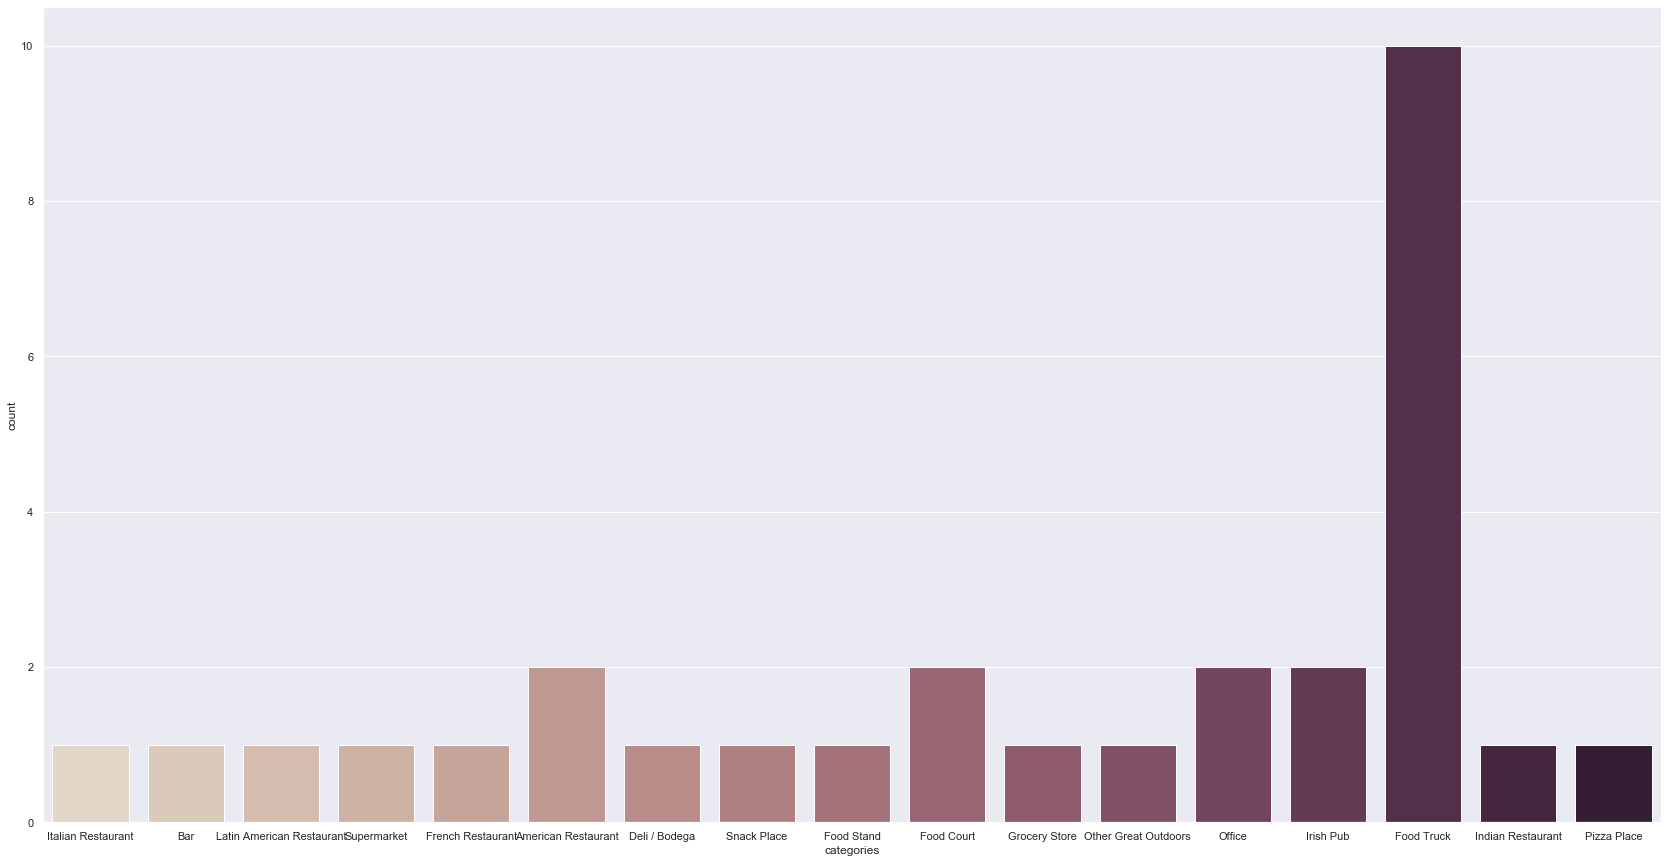

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(29,15)})
sns.countplot(x='categories',palette="ch:.25", data=dataframe_filtered)